### Assignment 5 classification

In [18]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# visualize func
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn import metrics

import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

def visualize_tree(tree, name):
    """StringIO(): creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format."""
    dot_data = StringIO()
    """export_graphviz(): exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’."""
    export_graphviz(tree, out_file = dot_data)
    """graph_from_dot_data(): will use the DOT object to create the graph."""
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png("./"+ name +".png")
    Image(graph.create_png())


In [19]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("./data/diabetes.csv", header=None, names=col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [205]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree = []
pred = []

tree1 = DecisionTreeClassifier()
tree1 = tree1.fit(X_train,y_train)
pred1 = tree1.predict(X_test)
print("Dicision tree Accuracy:",metrics.accuracy_score(y_test, pred1))
visualize_tree(tree1, "diabetes")

IndexError: list assignment index out of range

In [21]:
tree2 = DecisionTreeClassifier(criterion='gini', max_depth = 7)
tree2.fit(X_train, y_train)
pred2 = tree2.predict(X_test)
print('Dicision tree, Criterion = gini Accuracy:', accuracy_score(y_test, pred2))
visualize_tree(tree2, "gini")
print(metrics.classification_report(pred2, y_test))

Dicision tree, Criterion = gini Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       167
           1       0.51      0.67      0.58        64

   micro avg       0.73      0.73      0.73       231
   macro avg       0.68      0.71      0.69       231
weighted avg       0.76      0.73      0.74       231



In [22]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth = 7, splitter='random')
tree3.fit(X_train, y_train)
pred3 = tree3.predict(X_test)
print('Dicision tree, Criterion = entropy Accuracy:', accuracy_score(y_test, pred3))
visualize_tree(tree3, "entropy")
print(metrics.classification_report(pred3, y_test))

Dicision tree, Criterion = entropy Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       173
           1       0.51      0.74      0.60        58

   micro avg       0.75      0.75      0.75       231
   macro avg       0.70      0.75      0.71       231
weighted avg       0.80      0.75      0.77       231



In [23]:
Rtree = RandomForestClassifier(criterion = 'entropy', max_depth=4, random_state=0)
Rtree.fit(X_train, y_train)
Rpred = Rtree.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, Rpred))
print(metrics.classification_report(Rpred, y_test))

Random Forest Accuracy: 0.7835497835497836
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       158
           1       0.64      0.74      0.68        73

   micro avg       0.78      0.78      0.78       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.80      0.78      0.79       231



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [208]:
from sklearn.metrics import confusion_matrix

# confusion matrix need type list as input 
y_test_list = y_test.tolist() 

pred_list = []
pred_list.append(pred1.tolist())
pred_list.append(pred2.tolist())
pred_list.append(pred3.tolist())
pred_list.append(Rpred.tolist())

In [211]:
for i in range(4):
    tn, fp, fn, tp = confusion_matrix(y_test_list, pred_list[i]).ravel() # binary case
    if(i==0): print("Original decision tree:")
    elif(i==1): print("Gini decision tree:")
    elif(i==2): print("Entropy decision tree:")
    else: print("Random forest:")
    print("TP:", tp, "TN:",tn, "FP:",fp,"FN:" ,fn)

Original decision tree:
TP: 42 TN: 116 FP: 30 FN: 43
Gini decision tree:
TP: 43 TN: 125 FP: 21 FN: 42
Entropy decision tree:
TP: 43 TN: 131 FP: 15 FN: 42
Random forest:
TP: 54 TN: 127 FP: 19 FN: 31


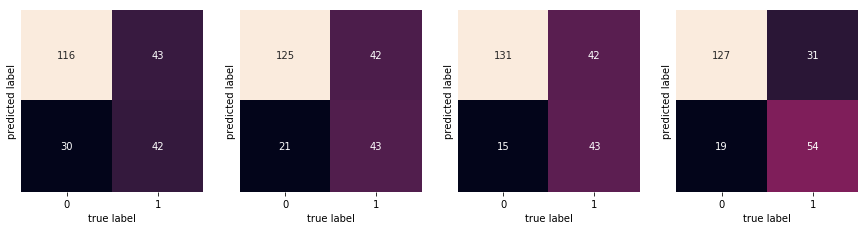

In [213]:
import seaborn  as sns
import matplotlib.pyplot as plt

ax = []
f, ax = plt.subplots(1,4, figsize = (15,10))

for i in range(4):
    g1 = sns.heatmap(confusion_matrix(y_test_list, pred_list[i]).T, square=True, annot=True, fmt='d', cbar=False,ax=ax[i])
    g1.set_ylabel('predicted label')
    g1.set_xlabel('true label')
    g1.set_yticks([])

plt.show()

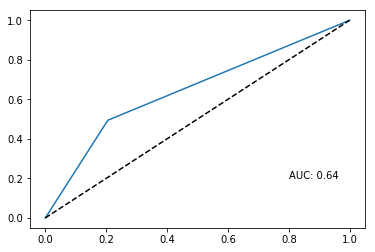

In [218]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(
        test_labels, test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+ str(auc)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return fig 

#for i in range(4):
roc = plot_ROC(y_test_list, pred_list[0])


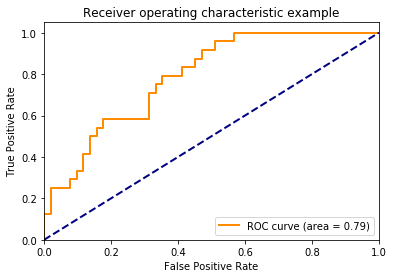

In [188]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

pred_list1
